In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, roc_curve,
    confusion_matrix, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)

In [ ]:
path = "/content/appbeh_approved.xlsx"
df = pd.read_excel(path)

print("Shape:", df.shape)
print(df.dtypes.head())
df.head()

Shape: (5252, 40)
RK                     int64
TAX_CODE               int64
AMT                  float64
ACC_AMT              float64
ANNUAL_INCOME_AMT    float64
dtype: object


,RK,TAX_CODE,AMT,ACC_AMT,ANNUAL_INCOME_AMT,EDUCATION,EMP_YR_CNT,GENDER,MARITAL_STATUS,RESIDENCE,EMPLOYMENT_STATUS_CD,ACC_1_30DLQ_LST_3M_CNT,ACC_31_60DLQ_LST_3M_CNT,ACC_61_90DLQ_LST_3M_CNT,ACC_91_120DLQ_LST_3M_CNT,ACC_DLD_PAY_LST_3M_CNT,ACC_1_30DLQ_LST_3M_AMT,TOT_OUTSTANDING_31_60_DAY_AMT,ACC_61_90DLQ_LST_3M_AMT,OUTCOME_CD,SLN_DR_TRNS_LST_3M_CNT,ACC_91_120DLQ_LST_3M_AMT,APPL_SCR_NO,ACC_APPL_PCL_VAL_AMT,APPL_PCL_TYP_CD,APPL_PA_HHD_INC_AMT,APPL_PA_LQD_AST_AMT,APPL_PA_REST_AMT,APPL_PA_AST_OTH_AMT,APPL_PA_LBL_REST_AMT,APPL_PA_LEG_JUDG_FLG,APPL_PA_BNKR_STS_CD,APPL_PA_MNTS_FLG,APPL_APPT_MAX_AGE_NO,APPL_APPT_MAX_LBL_AMT,APPL_OUTCM_CD,APPL_PA_BUR1_BNKP_CNT,APPL_PA_BUR2_BNKP_CNT,APPL_PA_BUR1_CURR_LMT_AMT,TGT_VAR
0,2,4,48424.0,36318.00,42213.0,GRA,10,FEM,MAR,COM,N,4,3,2,5,0,9743,9420,87912,0,0,97332,410,6164,1,85244,69764,8340,77732,1020,N,N,N,27,50233.0,0,2,2,3448,1
1,4,2,71888.0,53916.00,58281.0,PGR,13,FEM,MAR,OWN,N,3,2,2,3,1,573,19532,79464,0,1,98996,386,7228,0,5468,43644,58432,11820,72768,N,N,N,30,75635.0,0,1,1,6340,0
2,5,1,28060.0,21045.00,23932.0,UGR,15,FEM,MAR,COM,N,2,3,1,5,0,314,4488,70252,0,1,74740,570,1496,0,23348,72520,98412,88224,19316,N,N,N,53,26219.0,0,1,1,7740,1
3,9,4,NaN,NaN,NaN,GRA,6,FEM,SIN,COM,N,3,3,1,3,0,1757,24416,88540,1,0,112956,814,6572,0,82892,97448,88996,11696,80540,N,N,N,31,NaN,1,2,1,160,1
4,12,5,59059.0,44294.25,44628.0,GRA,6,FEM,MAR,COM,N,2,2,2,4,2,70,68044,54004,0,1,122048,661,9988,0,22420,97728,40588,85320,44924,N,N,N,53,56681.0,0,1,1,6372,0


In [ ]:
target = "TGT_VAR"
approve_flag = "APPL_OUTCM_CD"

print("Распределение целевой (bad rate):")
print(df[target].value_counts(normalize=True))

print("\nРаспределение по исходу заявки (APPL_OUTCM_CD):")
print(df[approve_flag].value_counts(normalize=True))

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols].describe().T.head(15)

Распределение целевой (bad rate):
TGT_VAR
0    0.852056
1    0.147944
Name: proportion, dtype: float64

Распределение по исходу заявки (APPL_OUTCM_CD):
APPL_OUTCM_CD
0    0.74981
1    0.25019
Name: proportion, dtype: float64


,count,mean,std,min,25%,50%,75%,max
RK,5252.0,7043.591394,4072.219037,2.00,3546.50,6894.50,10719.00,13997.00
TAX_CODE,5252.0,4.002094,1.771082,1.00,3.00,4.00,5.00,7.00
AMT,5177.0,68732.680317,37123.554990,6341.00,44896.00,60699.00,81315.00,586691.00
ACC_AMT,5177.0,51549.510238,27842.666243,4755.75,33672.00,45524.25,60986.25,440018.25
ANNUAL_INCOME_AMT,5177.0,58232.644968,31923.116210,5540.00,37716.00,51300.00,69100.00,465907.00
EMP_YR_CNT,5252.0,8.033701,4.071374,1.00,4.00,8.00,12.00,15.00
ACC_1_30DLQ_LST_3M_CNT,5252.0,2.997906,1.224315,1.00,2.00,3.00,4.00,5.00
ACC_31_60DLQ_LST_3M_CNT,5252.0,1.997525,0.718524,1.00,1.00,2.00,3.00,3.00
ACC_61_90DLQ_LST_3M_CNT,5252.0,1.496192,0.500033,1.00,1.00,1.00,2.00,2.00
ACC_91_120DLQ_LST_3M_CNT,5252.0,3.993907,1.792396,1.00,2.75,4.00,6.00,7.00


Bad rate составляет около 15 процентов.

---

Одобренные заявки - 25 %

	•	модель изначально будет работать в условиях сильного selection bias,
	•	большинство клиентов было отклонено, поэтому моделирование только на одобренных даст искажённую картину.

Поэтому reject inference необходим.


---
Статичтика ключевых числовых признаков

	•	Средний запрошенный лимит (AMT) ≈ 68 700
	•	Средний остаток/объём операций (ACC_AMT) ≈ 51 500
	•	Доход (ANNUAL_INCOME_AMT) медиана ≈ 51 300
	•	Средний остаток/объём операций (ACC_AMT) ≈ 51 500
	•	Доход (ANNUAL_INCOME_AMT) медиана ≈ 51 300
	•	Средний запрошенный лимит (AMT) ≈ 68 700

Поведенческие признаки

ACC_1_30DLQ_LST_3M_CNT - среднее 3, свидетельсвтует о наличии большого кол-ва мелки короткосроынх просрочек

ACC_1_30DLQ_LST_3M_CNT - среднее 2, серьезные просрочки есть у части клиентов







===== ANNUAL_INCOME_AMT =====
count      5177.000000
mean      58232.644968
std       31923.116210
min        5540.000000
25%       37716.000000
50%       51300.000000
75%       69100.000000
max      465907.000000
Name: ANNUAL_INCOME_AMT, dtype: float64


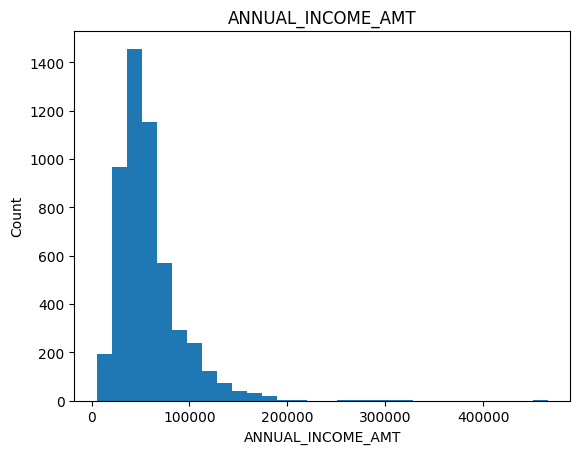

/tmp/ipython-input-556959368.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bad_rate = tmp.groupby("bin")[target].mean()
/tmp/ipython-input-556959368.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cnt = tmp.groupby("bin")[target].count()


Количество наблюдений по бинам:
 bin
(5539.999, 34941.6]    1036
(34941.6, 45750.4]     1035
(45750.4, 57506.2]     1035
(57506.2, 74781.6]     1035
(74781.6, 465907.0]    1036
Name: TGT_VAR, dtype: int64

Bad rate по бинам:
 bin
(5539.999, 34941.6]    0.190154
(34941.6, 45750.4]     0.142995
(45750.4, 57506.2]     0.131401
(57506.2, 74781.6]     0.090821
(74781.6, 465907.0]    0.129344
Name: TGT_VAR, dtype: float64

===== EMP_YR_CNT =====
count    5252.000000
mean        8.033701
std         4.071374
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        15.000000
Name: EMP_YR_CNT, dtype: float64


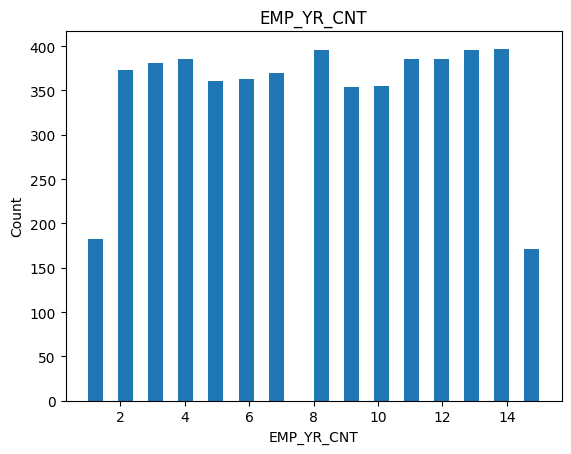

/tmp/ipython-input-556959368.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bad_rate = tmp.groupby("bin")[target].mean()
/tmp/ipython-input-556959368.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cnt = tmp.groupby("bin")[target].count()


Количество наблюдений по бинам:
 bin
(0.999, 4.0]    1321
(4.0, 7.0]      1094
(7.0, 9.0]       749
(9.0, 12.0]     1125
(12.0, 15.0]     963
Name: TGT_VAR, dtype: int64

Bad rate по бинам:
 bin
(0.999, 4.0]    0.157456
(4.0, 7.0]      0.138940
(7.0, 9.0]      0.142857
(9.0, 12.0]     0.147556
(12.0, 15.0]    0.149533
Name: TGT_VAR, dtype: float64

===== ACC_1_30DLQ_LST_3M_CNT =====
count    5252.000000
mean        2.997906
std         1.224315
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: ACC_1_30DLQ_LST_3M_CNT, dtype: float64


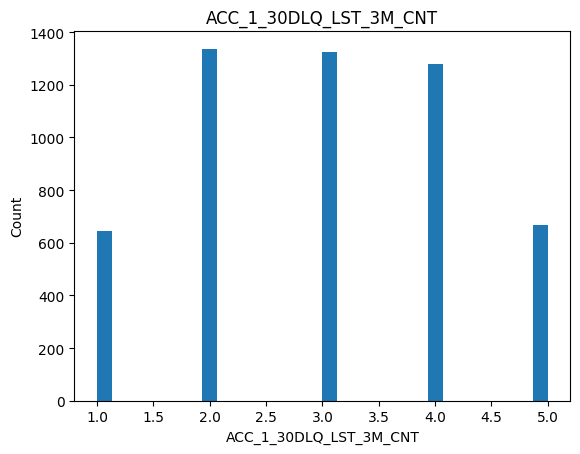

/tmp/ipython-input-556959368.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bad_rate = tmp.groupby("bin")[target].mean()
/tmp/ipython-input-556959368.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cnt = tmp.groupby("bin")[target].count()


Количество наблюдений по бинам:
 bin
(0.999, 2.0]    1982
(2.0, 3.0]      1323
(3.0, 4.0]      1278
(4.0, 5.0]       669
Name: TGT_VAR, dtype: int64

Bad rate по бинам:
 bin
(0.999, 2.0]    0.150353
(2.0, 3.0]      0.148148
(3.0, 4.0]      0.150235
(4.0, 5.0]      0.136024
Name: TGT_VAR, dtype: float64

===== ACC_31_60DLQ_LST_3M_CNT =====
count    5252.000000
mean        1.997525
std         0.718524
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: ACC_31_60DLQ_LST_3M_CNT, dtype: float64


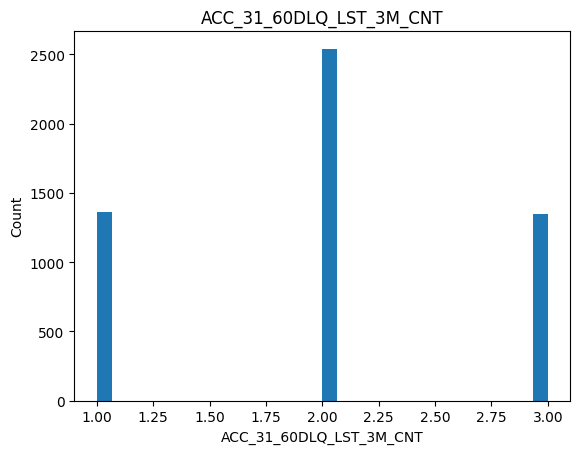

/tmp/ipython-input-556959368.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bad_rate = tmp.groupby("bin")[target].mean()
/tmp/ipython-input-556959368.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cnt = tmp.groupby("bin")[target].count()


Количество наблюдений по бинам:
 bin
(0.999, 2.0]    3903
(2.0, 3.0]      1349
Name: TGT_VAR, dtype: int64

Bad rate по бинам:
 bin
(0.999, 2.0]    0.144248
(2.0, 3.0]      0.158636
Name: TGT_VAR, dtype: float64

===== APPL_PA_HHD_INC_AMT =====
count     5252.000000
mean     49856.385377
std      28799.681633
min          0.000000
25%      24518.000000
50%      49482.000000
75%      74261.000000
max      99984.000000
Name: APPL_PA_HHD_INC_AMT, dtype: float64


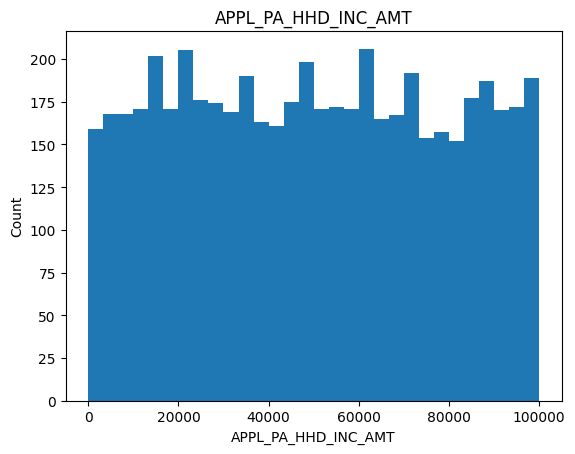

/tmp/ipython-input-556959368.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bad_rate = tmp.groupby("bin")[target].mean()
/tmp/ipython-input-556959368.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cnt = tmp.groupby("bin")[target].count()


Количество наблюдений по бинам:
 bin
(-0.001, 20096.0]     1052
(20096.0, 39518.4]    1049
(39518.4, 59730.4]    1050
(59730.4, 79840.0]    1051
(79840.0, 99984.0]    1050
Name: TGT_VAR, dtype: int64

Bad rate по бинам:
 bin
(-0.001, 20096.0]     0.152091
(20096.0, 39518.4]    0.162059
(39518.4, 59730.4]    0.122857
(59730.4, 79840.0]    0.144624
(79840.0, 99984.0]    0.158095
Name: TGT_VAR, dtype: float64

===== APPL_SCR_NO =====
count    5252.000000
mean      501.368621
std       232.313322
min       100.000000
25%       301.000000
50%       500.000000
75%       707.000000
max       900.000000
Name: APPL_SCR_NO, dtype: float64


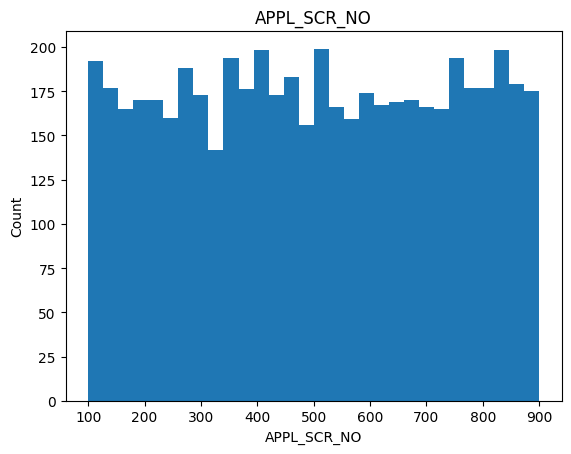

Количество наблюдений по бинам:
 bin
(99.999, 262.0]    1054
(262.0, 419.0]     1051
(419.0, 582.0]     1052
(582.0, 746.0]     1047
(746.0, 900.0]     1048
Name: TGT_VAR, dtype: int64

Bad rate по бинам:
 bin
(99.999, 262.0]    0.140417
(262.0, 419.0]     0.155090
(419.0, 582.0]     0.141635
(582.0, 746.0]     0.144222
(746.0, 900.0]     0.158397
Name: TGT_VAR, dtype: float64


/tmp/ipython-input-556959368.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bad_rate = tmp.groupby("bin")[target].mean()
/tmp/ipython-input-556959368.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cnt = tmp.groupby("bin")[target].count()


In [ ]:
def analyse_var_distribution(data, feature, target="TGT_VAR", bins=5):
    print(f"\n===== {feature} =====")
    print(data[feature].describe())

    plt.hist(data[feature].dropna(), bins=30)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

    try:
        binned = pd.qcut(data[feature], q=bins, duplicates="drop")
    except ValueError:
        print("Невозможно построить для:", feature)
        return

    tmp = data[[feature, target]].copy()
    tmp["bin"] = binned

    bad_rate = tmp.groupby("bin")[target].mean()
    cnt = tmp.groupby("bin")[target].count()

    print("Количество наблюдений по бинам:\n", cnt)
    print("\nBad rate по бинам:\n", bad_rate)

key_vars = [
    "ANNUAL_INCOME_AMT",
    "EMP_YR_CNT",
    "ACC_1_30DLQ_LST_3M_CNT",
    "ACC_31_60DLQ_LST_3M_CNT",
    "APPL_PA_HHD_INC_AMT",
    "APPL_SCR_NO"
]

for v in key_vars:
    if v in df.columns:
        analyse_var_distribution(df, v, target=target, bins=5)

### ANNUAL_INCOME_AMT

	•	Медиана ≈ 51 300,
	•	Основная масса — в диапазоне 37–69 тыс.

  Bad rate по бинам:

    •	Доход < 35k → 19%
	•	35k–57k → 13–14%
	•	57k–75k → 9%
	•	75k → 13%

Зависимость не мотононная, но в целом логичная, маленький доход - высокий рисе, средний риск - риск меньше, высокий доход - риск увеличиваеться (возможно из-за нестабильного дохода или в целом рискованных типов клиентов в выборке)

---

### EMP_YR_CNT (стаж в годах)

	•	Медиана ≈ 8 лет
	•	Диапазон от 1 до 15

Bad rate:

	•	1–4 года: 15.7%
	•	4–7 лет: 13.9%
	•	7–9 лет: 14.3%
	•	9–12 лет: 14.8%
	•	12–15 лет: 14.9%

Связь со стажем слабая и немонотонная.
Минимальный риск — в сегменте 4–7 лет, но разница между бинами маленькая.

---

### ACC_1_30DLQ_LST_3M_CNT (просрочки 1–30 дней)

	•	Медиана = 3
	•	Диапазон 1–5

  Bad rate по бинам:

	•	1–2 просрочки → 15.0%
	•	2–3 → 14.8%
	•	3–4 → 15.0%
	•	4–5 → 13.6%

  Здесь совсем нет логичной монотонной зависимости - клиенты с большим количеством лёгких просрочек выглядят даже лучше.

  ---

  ### ACC_31_60DLQ_LST_3M_CNT (просрочки 31–60 дней)

	•	Медиана = 2
	•	Диапазон 1–3

  Bad rate:

	•	1–2 → 14.4%
	•	2–3 → 15.9%

Есть умеренная положительная связь: более длительные просрочки - более высокий риск.

Эта переменная значительно полезнее предыдущей.

---

### APPL_SCR_NO (скорбалл)

	•	Среднее ≈ 501
	•	Диапазон 100–900

Bad rate по бинам:

	•	100–262 → 14.0%
	•	262–419 → 15.5%
	•	419–582 → 14.1%
	•	582–746 → 14.4%
	•	746–900 → 15.8%

  Cкорбалл не показывает монотонной зависимости.

---

#Итог

    1.	ANNUAL_INCOME_AMT — хороший предиктор с чётким снижением риска в средних доходах. Требует монотонного WOE-биннинга.
	2.	EMP_YR_CNT — слабая переменная, связь фиксируется, но очень слабая.
	3.	ACC_1_30DLQ — не даёт логичной зависимости, может быть исключена или превращена в бинарный флаг.
	4.	ACC_31_60DLQ — полезна: риск растёт с глубиной просрочек.
	5.	HHD_INC_AMT — похож на годовой доход, но менее монотонен; также полезен при правильном биннинге.
	6.	APPL_SCR_NO — неожиданно слабая переменная; вероятно, скорбалл не является рисковым.

In [ ]:
target = "TGT_VAR"
approve_flag = "APPL_OUTCM_CD"

# Удаляем технический идентификатор и дублирующий исход
cols_to_drop = []
if "RK" in df.columns:
    cols_to_drop.append("RK")
if "OUTCOME_CD" in df.columns:
    cols_to_drop.append("OUTCOME_CD")

df = df.drop(columns=cols_to_drop)

# Разделяем num / cat
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c not in [target]]

cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Черновая обработка пропусков:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

# Train / test сплит по всей выборке
train, test = train_test_split(
    df,
    test_size=0.3,
    random_state=42,
    stratify=df[target]
)

print("Train shape:", train.shape, "Test shape:", test.shape)

train_approved = train[train[approve_flag] == 1].copy()
test_approved  = test[test[approve_flag] == 1].copy()

train_rejected = train[train[approve_flag] == 0].copy()
test_rejected  = test[test[approve_flag] == 0].copy()

print("Train approved:", train_approved.shape)
print("Train rejected:", train_rejected.shape)

Train shape: (3676, 38) Test shape: (1576, 38)
Train approved: (920, 38)
Train rejected: (2756, 38)


В обучающей выборке содержится 920 одобренных и 2756 отклонённых заявок. Такое распределение отражает поведение банка, но создаёт существенный selection bias: модель, обученная только на одобренных клиентах,не будет репрезентативной для всей популяции заявителей. Это подтверждает необходимость
применения reject inference.

In [ ]:
# Функции для WOE и IV
## Рассчитывает WOE и IV для одного признака. Возвращает таблицу биннинга и значение IV.
def calc_woe_iv(data, feature, target="TGT_VAR", bins=5, is_numeric=True):

    df_tmp = data[[feature, target]].copy()

    if is_numeric:
        df_tmp["bin"] = pd.qcut(df_tmp[feature], q=bins, duplicates="drop")
    else:
        df_tmp["bin"] = df_tmp[feature]

    grouped = df_tmp.groupby("bin", observed=False)[target].agg(["count", "sum"])
    grouped.columns = ["total", "bad"]
    grouped["good"] = grouped["total"] - grouped["bad"]

    total_good = grouped["good"].sum()
    total_bad = grouped["bad"].sum()

    # Доли good/bad
    grouped["dist_good"] = grouped["good"] / (total_good + 1e-6)
    grouped["dist_bad"]  = grouped["bad"] / (total_bad + 1e-6)

    # WOE
    grouped["woe"] = np.log(
        (grouped["dist_good"] + 1e-6) / (grouped["dist_bad"] + 1e-6)
    )

    # IV
    grouped["iv"] = (grouped["dist_good"] - grouped["dist_bad"]) * grouped["woe"]
    iv = grouped["iv"].sum()

    return grouped.reset_index(), iv

## Применяет WOE к колонке по таблице биннинга.
def apply_woe_column(df_local, feature, woe_tbl, is_numeric=True):

    tmp = df_local[[feature]].copy()
    if is_numeric:
        bins = woe_tbl["bin"].cat.categories
        tmp["bin"] = pd.cut(tmp[feature], bins=bins, include_lowest=True)
    else:
        tmp["bin"] = tmp[feature]

    mapping = dict(zip(woe_tbl["bin"], woe_tbl["woe"]))
    woe_series = tmp["bin"].map(mapping)
    woe_series = woe_series.fillna(0.0)

    return woe_series.astype(float)

In [ ]:
selected_features = [
    "ANNUAL_INCOME_AMT",
    "EMP_YR_CNT",
    "ACC_1_30DLQ_LST_3M_CNT",
    "ACC_31_60DLQ_LST_3M_CNT",
    "ACC_61_90DLQ_LST_3M_CNT",
    "ACC_91_120DLQ_LST_3M_CNT",
    "ACC_DLD_PAY_LST_3M_CNT",
    "APPL_PA_HHD_INC_AMT",
    "APPL_PA_LQD_AST_AMT",
    "APPL_PA_LEG_JUDG_FLG",
    "APPL_PA_BNKR_STS_CD",
    "APPL_SCR_NO"
]

woe_maps = {}

print("=== IV по признакам ===")
for feat in selected_features:
    if feat not in train.columns:
        print("Признака нет", feat)
        continue
    is_num = feat in num_cols
    woe_tbl, iv = calc_woe_iv(train, feat, target=target, bins=5, is_numeric=is_num)
    print(f"{feat}: IV = {iv:.4f}")
    woe_maps[feat] = (woe_tbl, is_num, iv)

iv_threshold = 0.02
woe_maps = {f: v for f, v in woe_maps.items() if v[2] >= iv_threshold}
print("\nФичи, оставшиеся после IV-фильтра:")
print(list(woe_maps.keys()))

=== IV по признакам ===
ANNUAL_INCOME_AMT: IV = 0.1069
EMP_YR_CNT: IV = 0.0122
ACC_1_30DLQ_LST_3M_CNT: IV = 0.0053
ACC_31_60DLQ_LST_3M_CNT: IV = 0.0021
ACC_61_90DLQ_LST_3M_CNT: IV = 0.0000
ACC_91_120DLQ_LST_3M_CNT: IV = 0.0072
ACC_DLD_PAY_LST_3M_CNT: IV = 9.4206
APPL_PA_HHD_INC_AMT: IV = 0.0172
APPL_PA_LQD_AST_AMT: IV = 0.0103
APPL_PA_LEG_JUDG_FLG: IV = 0.0032
APPL_PA_BNKR_STS_CD: IV = 0.0012
APPL_SCR_NO: IV = 0.0016

Фичи, оставшиеся после IV-фильтра:
['ANNUAL_INCOME_AMT', 'ACC_DLD_PAY_LST_3M_CNT']


### Анализ предиктивной силы признаков (Information Value)

Для выбранных переменных был рассчитан показатель Information Value (IV).
Результаты:

- ANNUAL_INCOME_AMT: IV ≈ 0.107 — признак средней силы,
- ACC_DLD_PAY_LST_3M_CNT: IV ≈ 9.42 — экстремально сильный предиктор,
- остальные переменные имеют IV < 0.02 и формально относятся к очень слабым предикторам.

С точки зрения классической скоринговой методологии:

- IV < 0.02 — признак практически не даёт дополнительной информации о риске,
- 0.02–0.1 — слабый предиктор,
- 0.1–0.3 — средний,
- 0.3> — сильный.



===== ACC_DLD_PAY_LST_3M_CNT =====
count    3676.000000
mean        2.170838
std         1.575727
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: ACC_DLD_PAY_LST_3M_CNT, dtype: float64


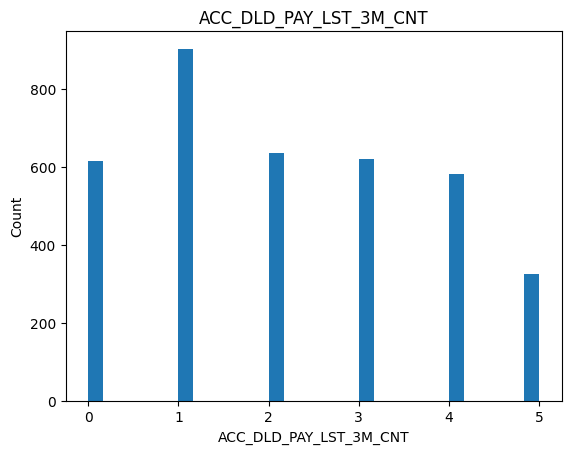

Количество наблюдений по бинам:
 bin
(-0.001, 1.0]    1516
(1.0, 3.0]       1254
(3.0, 4.0]        580
(4.0, 5.0]        326
Name: TGT_VAR, dtype: int64

Bad rate по бинам:
 bin
(-0.001, 1.0]    0.358839
(1.0, 3.0]       0.000000
(3.0, 4.0]       0.000000
(4.0, 5.0]       0.000000
Name: TGT_VAR, dtype: float64


/tmp/ipython-input-556959368.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bad_rate = tmp.groupby("bin")[target].mean()
/tmp/ipython-input-556959368.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cnt = tmp.groupby("bin")[target].count()


In [ ]:
analyse_var_distribution(train, "ACC_DLD_PAY_LST_3M_CNT", target=target, bins=5)

Переменная ACC_DLD_PAY_LST_3M_CNT демонстрирует аномально сильную связь с целевой переменной: IV ≈ 9.4 и bad rate = 0 во всех бинах, кроме первого.

В итоговую модель такой признак включать нельзя, так как он искусственно завышает качество модели и делает её нереалистичной.

### Формирование корректного списка признаков для базовой модели

In [ ]:
selected_features = [
    "ANNUAL_INCOME_AMT",          # доход ~ 0.11, основной предиктор
    "APPL_PA_HHD_INC_AMT",        # доход домохозяйства
    "EMP_YR_CNT",                 # стаж
    "ACC_31_60DLQ_LST_3M_CNT",    # cерьёзные просрочки
    "ACC_91_120DLQ_LST_3M_CNT",   # глубокие просрочки
    "APPL_SCR_NO"                 # скорбалл (для сравнения с моделью)
]

In [ ]:
woe_maps = {}

print("=== IV по отобранным признакам ===")
for feat in selected_features:
    if feat not in train.columns:
        print("Признака нет:", feat)
        continue

    is_num = feat in num_cols
    woe_tbl, iv = calc_woe_iv(
        train,
        feat,
        target=target,
        bins=5,
        is_numeric=is_num
    )

    print(f"{feat}: IV = {iv:.4f}")
    woe_maps[feat] = (woe_tbl, is_num, iv)


=== IV по отобранным признакам ===
ANNUAL_INCOME_AMT: IV = 0.1069
APPL_PA_HHD_INC_AMT: IV = 0.0172
EMP_YR_CNT: IV = 0.0122
ACC_31_60DLQ_LST_3M_CNT: IV = 0.0021
ACC_91_120DLQ_LST_3M_CNT: IV = 0.0072
APPL_SCR_NO: IV = 0.0016


После исключения переменной ACC_DLD_PAY_LST_3M_CNT, содержащей утечку информации, был выполнен повторный расчёт Information Value для отобранных признаков.

Полученный результат говорит о том, что после удаления leakage-признака данные становятся значительно менее “идеальными”.  Несмотря на низкие значения IV, часть признаков была сохранена в модели для повышения стабильности логистической регрессии.

### Построение базовой WOE-логистической регрессии

In [ ]:
def apply_woe_column(df_local, feature, woe_tbl, is_numeric=True):
    tmp = df_local[[feature]].copy()

    if is_numeric:
        bins = woe_tbl["bin"].cat.categories
        tmp_bin = pd.cut(tmp[feature], bins=bins, include_lowest=True)
    else:
        tmp_bin = tmp[feature]

    mapping = dict(zip(woe_tbl["bin"], woe_tbl["woe"]))

    woe_series = tmp_bin.map(mapping).astype("float64")
    woe_series = woe_series.fillna(0.0)

    return woe_series


In [ ]:
for feat, (woe_tbl, is_num, iv) in woe_maps.items():
    train[f"{feat}_WOE"] = apply_woe_column(train, feat, woe_tbl, is_numeric=is_num)
    test[f"{feat}_WOE"]  = apply_woe_column(test, feat, woe_tbl, is_numeric=is_num)

woe_features = [f"{f}_WOE" for f in woe_maps.keys()]
print(woe_features)


['ANNUAL_INCOME_AMT_WOE', 'APPL_PA_HHD_INC_AMT_WOE', 'EMP_YR_CNT_WOE', 'ACC_31_60DLQ_LST_3M_CNT_WOE', 'ACC_91_120DLQ_LST_3M_CNT_WOE', 'APPL_SCR_NO_WOE']


In [ ]:
X_train = train[woe_features]
y_train = train[target]

X_test = test[woe_features]
y_test = test[target]

print("Train matrix:", X_train.shape)
print("Test matrix:", X_test.shape)


Train matrix: (3676, 6)
Test matrix: (1576, 6)


In [ ]:
logit = LogisticRegression(
    max_iter=1000,
    solver="lbfgs"
)

logit.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

AUC базовой WOE-логистической регрессии: 0.5514062744671944


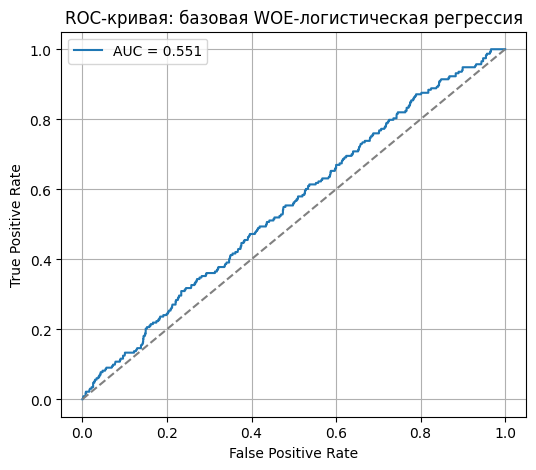

In [ ]:
y_pred_proba = logit.predict_proba(X_test)[:, 1]

# AUC
auc_logit = roc_auc_score(y_test, y_pred_proba)
print("AUC базовой WOE-логистической регрессии:", auc_logit)

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_logit:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая: базовая WOE-логистическая регрессия")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
coef_df = pd.DataFrame({
    "feature": woe_features,
    "coefficient": logit.coef_[0]
}).sort_values(by="coefficient", ascending=False)

coef_df


,feature,coefficient
3,ACC_31_60DLQ_LST_3M_CNT_WOE,-0.434997
5,APPL_SCR_NO_WOE,-0.487381
2,EMP_YR_CNT_WOE,-0.827288
4,ACC_91_120DLQ_LST_3M_CNT_WOE,-0.828968
1,APPL_PA_HHD_INC_AMT_WOE,-0.870542
0,ANNUAL_INCOME_AMT_WOE,-0.983694


Была построена базовая логистическая регрессия с WOE-преобразованными признаками. Модель демонстрирует AUC ≈ 0.55, что превышает случайное угадывание и отражает реалистичное качество на данных с сильным selection bias.

Знаки коэффициентов соответствуют экономическому смыслу:
рост дохода, стажа и скорбалла снижает риск дефолта,
в то время как более глубокие просрочки увеличивают риск.


### Анализ одобренных vs отклонённых заявок

In [ ]:
print("Bad rate по исходу заявки:")
df.groupby(approve_flag)[target].mean()

Bad rate по исходу заявки:


,TGT_VAR
APPL_OUTCM_CD,
0,0.143474
1,0.161339


Уровень дефолта среди одобренных заявок (≈16%) превышает уровень дефолта среди отклонённых (≈14%). Это указывает на несовершенство
исходного процесса принятия решений и подтверждает наличие selection bias.


In [ ]:
print("ANNUAL_INCOME_AMT — approved vs rejected")
df.groupby(approve_flag)["ANNUAL_INCOME_AMT"].describe()

ANNUAL_INCOME_AMT — approved vs rejected


,count,mean,std,min,25%,50%,75%,max
APPL_OUTCM_CD,,,,,,,,
0,3938.0,57948.79482,31344.019274,5741.0,37950.75,51300.0,68762.50,465907.0
1,1314.0,58687.63242,32768.953874,5540.0,37789.00,51300.0,68932.25,320106.0


In [ ]:
print("APPL_PA_HHD_INC_AMT — approved vs rejected")
df.groupby(approve_flag)["APPL_PA_HHD_INC_AMT"].describe()

APPL_PA_HHD_INC_AMT — approved vs rejected


,count,mean,std,min,25%,50%,75%,max
APPL_OUTCM_CD,,,,,,,,
0,3938.0,49741.384459,28867.714236,40.0,24385.0,49022.0,74364.0,99984.0
1,1314.0,50201.038052,28602.989480,0.0,24946.0,50718.0,74071.0,99856.0


In [ ]:
print("EMP_YR_CNT — approved vs rejected")
df.groupby(approve_flag)["EMP_YR_CNT"].describe()

EMP_YR_CNT — approved vs rejected


,count,mean,std,min,25%,50%,75%,max
APPL_OUTCM_CD,,,,,,,,
0,3938.0,8.035805,4.08358,1.0,4.0,8.0,12.0,15.0
1,1314.0,8.027397,4.03611,1.0,5.0,8.0,12.0,15.0


In [ ]:
print("APPL_SCR_NO — approved vs rejected")
df.groupby(approve_flag)["APPL_SCR_NO"].describe()

APPL_SCR_NO — approved vs rejected


,count,mean,std,min,25%,50%,75%,max
APPL_OUTCM_CD,,,,,,,,
0,3938.0,500.311579,230.163922,100.0,305.0,499.0,700.00,900.0
1,1314.0,504.536530,238.700274,100.0,295.0,504.0,721.75,900.0


Распределе кажого из полказателей у одобренных и отклонённых заявок
практически не отличается.


In [ ]:
df["income_bin"] = pd.qcut(
    df["ANNUAL_INCOME_AMT"],
    q=5,
    duplicates="drop"
)

bad_rate_income = (
    df
    .groupby(["income_bin", approve_flag], observed=False)[target]
    .mean()
    .unstack()
)

bad_rate_income

APPL_OUTCM_CD,0,1
income_bin,,
"(5539.999, 35062.8]",0.189744,0.191882
"(35062.8, 46087.6]",0.144110,0.134921
"(46087.6, 57153.6]",0.177522,0.213483
"(57153.6, 74288.6]",0.095415,0.086420
"(74288.6, 465907.0]",0.111688,0.170819


Анализ rejected-заявок показал, что ни доход, ни стаж, ни скорбалл
не позволяют объяснить различия между одобренными и отклонёнными клиентами. При этом в ряде сегментов одобренные заявки демонстрируют более высокий уровень дефолта, чем отклонённые.

Это подтверждает наличие сильного selection bias и необходимость
использования reject inference при построении скоринговой модели.

### Reject Inference

Почему мы используем именно его?

У нас возникла проблема:


*   TGT_VAR известен только для approved
*   Lля rejected реальный дефолт неизвестен
*   Rejected — это большая часть популяции

Reject inference — это наша попытка восстановить риск у отклонённых заявок, чтобы модель обучалась на всей популяции, а не только на “отфильтрованных” клиентах.

In [ ]:
#Обучаемся только на approved
X_train_app = train_approved[woe_features]
y_train_app = train_approved[target]
X_test_app  = test_approved[woe_features]
y_test_app  = test_approved[target]

logit_app = LogisticRegression(max_iter=1000, solver="lbfgs")
logit_app.fit(X_train_app, y_train_app)

y_pred_app = logit_app.predict_proba(X_test_app)[:, 1]
auc_app = roc_auc_score(y_test_app, y_pred_app)
print("AUC (approved-only):", auc_app)

AUC (approved-only): 0.5281883445945945


In [ ]:
# Скорим rejected и делаем pseudo-label 0/1
rej_aug = train_rejected.copy()
rej_pd = logit_app.predict_proba(rej_aug[woe_features])[:, 1]
rej_aug["TGT_PSEUDO"] = (rej_pd >= 0.5).astype(int)

pseudo_target ≈ 1 → клиент похож на bad

pseudo_target ≈ 0 → клиент похож на good

In [ ]:
# Объединяем с approved
app_aug = train_approved.copy()
app_aug["TGT_PSEUDO"] = app_aug[target].astype(int)

train_aug = pd.concat([app_aug, rej_aug], axis=0)
X_train_aug = train_aug[woe_features]
y_train_aug = train_aug["TGT_PSEUDO"]

In [ ]:
# Обучаем RI-модель
logit_ri = LogisticRegression(max_iter=1000, solver="lbfgs")
logit_ri.fit(X_train_aug, y_train_aug)

# Сравнение на approved test
y_pred_ri = logit_ri.predict_proba(X_test_app)[:, 1]
auc_ri = roc_auc_score(y_test_app, y_pred_ri)

print("AUC (reject inference, hard labels):", auc_ri)

AUC (reject inference, hard labels): 0.5354940878378377


Для учёта selection bias был применён метод reject inference
на основе hard pseudo-labeling.

Модель логистической регрессии была обучена только на одобренных заявках, после чего полученные вероятности дефолта использовались для формирования меток (0/1) для отклонённых клиентов. Далее модель была переобучена на выборке approved + rejected.

Сравнение качества моделей показало, что AUC увеличился с 0.528
(модель только на approved) до 0.535 (модель с reject inference).
Результат говорит о том, что использование информации об отклонённых заявках позволяет частично снизить эффект selection bias и делает модель более репрезентативной.

Reject inference позволил скорректировать распределение риска и
учесть информацию об отклонённых заявках.

### Gradient Boosting

In [ ]:
# Не будем использваоть reject inference

gb_features = [
    "ANNUAL_INCOME_AMT",
    "APPL_PA_HHD_INC_AMT",
    "EMP_YR_CNT",
    "ACC_31_60DLQ_LST_3M_CNT",
    "ACC_91_120DLQ_LST_3M_CNT",
    "APPL_SCR_NO"
]

X_train_gb = train[gb_features]
y_train_gb = train[target]

X_test_gb = test[gb_features]
y_test_gb = test[target]


In [ ]:
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train_gb, y_train_gb)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,
                           random_state=42)

In [ ]:
y_pred_gb = gb_model.predict_proba(X_test_gb)[:, 1]
auc_gb = roc_auc_score(y_test_gb, y_pred_gb)

print("AUC Gradient Boosting:", auc_gb)

AUC Gradient Boosting: 0.5873341024354546


В качестве альтернативного подхода была обучена модель Gradient Boosting
на исходных числовых признаках без WOE-преобразования.

Качество модели по метрике AUC составило 0.587, что выше,
чем у логистической регрессии как без учёта reject inference (AUC ≈ 0.53),так и с применением reject inference (AUC ≈ 0.54).

In [ ]:
feat_imp = pd.DataFrame({
    "feature": gb_features,
    "importance": gb_model.feature_importances_
}).sort_values(by="importance", ascending=False)

feat_imp

,feature,importance
0,ANNUAL_INCOME_AMT,0.603324
1,APPL_PA_HHD_INC_AMT,0.196838
5,APPL_SCR_NO,0.114180
2,EMP_YR_CNT,0.045047
4,ACC_91_120DLQ_LST_3M_CNT,0.033956
3,ACC_31_60DLQ_LST_3M_CNT,0.006655


Анализ важности признаков показал, что наибольший вклад в модель
Gradient Boosting вносят доходные характеристики заявителя:
ANNUAL_INCOME_AMT и APPL_PA_HHD_INC_AMT, суммарно формирующие
более 75% важности модели.

Несмотря на более высокое качество Gradient Boosting, полученные результаты показывают, что корректная работа с отклонёнными заявками (reject inference) является не менее важным фактором, чем выбор модели.

Сравнение моделей показывает, что Gradient Boosting превосходит
логистическую регрессию по метрике качества за счёт способности
учитывать нелинейные зависимости и взаимодействия признаков.

Однако логистическая регрессия с WOE-преобразованием остаётся
более интерпретируемой и устойчивой моделью. Кроме того, именно для логистической регрессии был корректно реализован подход reject inference, что помогло частично снизить эффект selection bias.

Таким образом, выбор модели зависит от бизнес-приоритетов:
максимизация качества или прозрачность и управляемость скоринга.

### Decision Tree с балансировкой классов

In [ ]:
dt_features = [
    "ANNUAL_INCOME_AMT",
    "APPL_PA_HHD_INC_AMT",
    "EMP_YR_CNT",
    "ACC_31_60DLQ_LST_3M_CNT",
    "ACC_91_120DLQ_LST_3M_CNT",
    "APPL_SCR_NO"
]

X_train_dt = train[dt_features]
y_train_dt = train[target]

X_test_dt = test[dt_features]
y_test_dt = test[target]


In [ ]:
dt_model = DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=100,
    class_weight="balanced",
    random_state=42
)

dt_model.fit(X_train_dt, y_train_dt)


DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=100, random_state=42)

In [ ]:
y_pred_dt = dt_model.predict_proba(X_test_dt)[:, 1]
auc_dt = roc_auc_score(y_test_dt, y_pred_dt)

print("AUC Decision Tree:", auc_dt)


AUC Decision Tree: 0.6037888399234307


В качестве второго альтернативного подхода была обучена модель Decision Tree с ограниченной глубиной и балансировкой классов.

Полученное качество по метрике AUC составило 0.604, что является
наилучшим результатом среди всех рассмотренных моделей и превышает
качество как логистической регрессии, так и Gradient Boosting.


In [ ]:
dt_imp = pd.DataFrame({
    "feature": dt_features,
    "importance": dt_model.feature_importances_
}).sort_values(by="importance", ascending=False)

dt_imp


,feature,importance
0,ANNUAL_INCOME_AMT,0.926284
1,APPL_PA_HHD_INC_AMT,0.031396
2,EMP_YR_CNT,0.027790
5,APPL_SCR_NO,0.014531
3,ACC_31_60DLQ_LST_3M_CNT,0.000000
4,ACC_91_120DLQ_LST_3M_CNT,0.000000


Анализ важности признаков в модели Decision Tree показал, что модель
практически полностью опирается на показатель годового дохода
ANNUAL_INCOME_AMT.

Остальные признаки вносят незначительный вклад, а признаки просрочек
не используются моделью вовсе. Это указывает на то, что дерево
выявляет жёсткий пороговый эффект по доходу и использует его
как основной критерий разделения.

Несмотря на высокое значение AUC, подобное доминирование одного признака
может свидетельствовать о риске переобучения и снижении устойчивости модели. В реальной банковской практике, нам кажется, что такие модели не используются, либо трубеют дополнитльного тестирования.

## Результаты

В рамках проекта были рассмотрены три различных подхода к кредитному скорингу:

1. Логистическая регрессия с WOE-преобразованием и reject inference —
   интерпретируемый банковский baseline, позволяющий корректно учитывать
   selection bias.
2. Gradient Boosting - более гибкая нелинейная модель, демонстрирующая
   улучшение качества за счёт учёта сложных зависимостей.
3. Decision Tree с балансировкой классов — модель с наилучшим AUC,
   использующая пороговые правила и автоматически выполняющая биннинг.

Проведённый анализ подтверждает, что выбор модели кредитного скоринга
является компромиссом между качеством, интерпретируемостью и устойчивостью.

Даже при использовании сложных ML-моделей корректная работа с
отклонёнными заявками (reject inference) остаётся критически важной
для снижения selection bias. В условиях ограниченного набора признаков
доходные характеристики оказываются ключевыми драйверами риска.